In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("csv/applicant.csv",
                   names=[
        "Age","Workclass","fnlwgt","Education","Education-Num","Marital Status",
        "Occupation","Relationship","Race","Gender","Capital Gain","Capital Loss",
        "Hours per week","Country","Target"],
                   sep=r'\s*,\s*',
                engine='python',
                    na_values='?'
                  )

In [3]:
data

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-Num   32561 non-null  int64 
 5   Marital Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Gender          32561 non-null  object
 10  Capital Gain    32561 non-null  int64 
 11  Capital Loss    32561 non-null  int64 
 12  Hours per week  32561 non-null  int64 
 13  Country         31978 non-null  object
 14  Target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
data.describe()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
data.describe(include= "O")

,Workclass,Education,Marital Status,Occupation,Relationship,Race,Gender,Country,Target
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [7]:
fig = plt.figure(figsize=(20,20))
cols = 3
rows = math.ceil(float(data.shape[1])/cols)

<Figure size 1440x1440 with 0 Axes>

<ipython-input-8-cd7952a95057>:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if data.dtypes[column] ==np.object:


ValueError: Can not reset the axes.  You are probably trying to re-use an artist in more than one Axes which is not supported

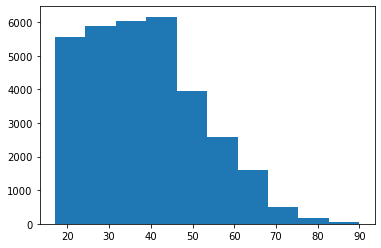

In [8]:
for i,column in enumerate(['Age','Workclass','Education','Occupation','Race','Gender']):
    ax=fig.add_subplot(rows,cols,i+1)
    ax.set_title(column)
    if data.dtypes[column] ==np.object: 
        data[column].value_counts().plot(kind="bar",axes=ax)
    else:
        data[column].hist(axes=ax)
        plt.xticks(rotation='vertical')
plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()

In [ ]:
le = preprocessing.LabelEncoder()
data["Occupation"] = le.fit_transform(data["Occupation"].astype(str))
data['Target']=le.fit_transform(data['Target'].astype(str))

In [ ]:
data["Target"] 

In [ ]:
data.groupby("Education-Num").Target.mean().plot(kind="bar")
plt.show()

In [ ]:
X = data[["Education-Num", "Occupation"]]
y = data["Target"]

In [ ]:
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=0)

In [ ]:
classifier = SVC()
classifier.fit(X_train, Y_train)

In [ ]:
score = classifier.score(x_test, y_test)

In [ ]:
score

In [ ]:

corrmat=data.corr()
f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(corrmat,vmax=.8, square=True);
plt.show()

data['Race']=le.fit_transform(data['Race'].astype(str))
data['Gender']=le.fit_transform(data['Gender'].astype(str))
data['Marital Status']=le.fit_transform(data['Marital Status'].astype(str))
data['Education']=le.fit_transform(data['Education'].astype(str))
corrmat=data.corr()
f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(corrmat,vmax=.8, square=True);
plt.show()

f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(corrmat,vmax=.8,square=True,annot=True,fmt='.2f')
plt.show()


In [ ]:
#score the model
X=data[['Education-Num','Occupation','Age','Gender']]
Y=data['Target']
X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
classifier=SVC()
classifier.fit(X_train,Y_train)
score=classifier.score(x_test,y_test)
print(score)

In [ ]:
classifier =SVC(kernel='rbf', C=1.0)
classifier.fit(X_train,Y_train)
score=classifier.score(x_test,y_test)


classifier =SVC(kernel='linear', C=10.0)
classifier.fit(X_train,Y_train)
score=classifier.score(x_test,y_test)
